In [1]:
#caution
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Github/flare-cme/2022

Mounted at /content/drive
/content/drive/MyDrive/Github/flare-cme/2022


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
positive = pd.read_csv("positive_2022.csv")
negative = pd.read_csv("negative_2022.csv")

In [4]:
data = pd.concat([positive,negative],axis =0,ignore_index=True)
data

,Unnamed: 0,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,...,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,HARPNUM,NOAA,Class,Peak Time
0,0,2.246101e+22,107.736,0.021724,15533.100,54.882,2975.118,77.983,0.041413,59.541,...,1.226148e+13,7.077275e+23,50.329,945.314636,4.805,745.287,377,11158,X2.2,2011.02.14_01:56_TAI
1,1,2.235615e+22,93.863,-0.001943,10914.060,44.178,1636.710,56.639,-0.003942,50.680,...,3.884153e+12,4.733711e+23,43.479,961.502686,4.303,63.441,401,11166,M2.0,2011.03.06_14:30_TAI
2,2,6.039302e+22,91.233,0.007535,9912.353,29.044,4229.148,49.560,0.015028,41.150,...,3.430647e+13,1.074422e+24,35.873,1934.446167,4.865,615.008,393,11164,M3.7,2011.03.06_20:12_TAI
3,3,2.384940e+22,109.706,0.009620,3703.910,13.500,1505.331,47.602,0.030907,34.321,...,1.969386e+13,1.879337e+23,28.525,970.551636,3.971,367.530,637,11226,M2.5,2011.06.06_06:41_TAI
4,4,1.989983e+22,109.891,0.032849,12062.610,44.090,2547.054,73.681,0.079865,53.270,...,4.460671e+13,5.269515e+23,43.929,1259.099854,4.777,1080.528,750,11261,M6.0,2011.08.02_13:48_TAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,377,7.415288e+22,111.235,-0.014440,10142.720,30.559,6329.881,55.636,-0.034078,42.614,...,4.276540e+13,1.482763e+24,36.734,3957.617920,5.009,1589.447,8230,13014,M3.0,2022.05.19_07:45_TAI
503,378,2.931649e+22,112.732,-0.005219,7231.422,35.073,2462.727,65.444,-0.014124,47.700,...,1.216627e+13,4.678707e+23,39.452,1989.069946,4.320,254.263,8390,13053,M1.2,2022.07.13_04:31_TAI
504,379,4.118574e+22,85.999,0.005067,10046.240,37.757,2472.216,45.647,0.010444,46.940,...,9.584498e+12,8.168017e+23,41.358,1465.274292,4.591,310.188,8402,13055,M1.4,2022.07.15_15:39_TAI
505,380,5.901715e+21,126.231,0.021628,7852.986,37.339,627.644,76.218,0.058771,50.605,...,1.177000e+13,1.020593e+23,41.407,299.992493,4.149,211.627,8507,13078,M1.1,2022.08.14_21:53_TAI


In [5]:
data = data.drop(["Unnamed: 0","HARPNUM","NOAA","Class","Peak Time"],axis =1)
data

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH
0,2.246101e+22,107.736,0.021724,15533.100,54.882,2975.118,77.983,0.041413,59.541,117.582,0.104880,5.032922e+13,1.226148e+13,7.077275e+23,50.329,945.314636,4.805,745.287
1,2.235615e+22,93.863,-0.001943,10914.060,44.178,1636.710,56.639,-0.003942,50.680,99.163,0.130367,3.344854e+13,3.884153e+12,4.733711e+23,43.479,961.502686,4.303,63.441
2,6.039302e+22,91.233,0.007535,9912.353,29.044,4229.148,49.560,0.015028,41.150,100.010,-0.131131,7.631205e+13,3.430647e+13,1.074422e+24,35.873,1934.446167,4.865,615.008
3,2.384940e+22,109.706,0.009620,3703.910,13.500,1505.331,47.602,0.030907,34.321,110.939,0.004581,3.136324e+13,1.969386e+13,1.879337e+23,28.525,970.551636,3.971,367.530
4,1.989983e+22,109.891,0.032849,12062.610,44.090,2547.054,73.681,0.079865,53.270,115.866,0.322013,4.301247e+13,4.460671e+13,5.269515e+23,43.929,1259.099854,4.777,1080.528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,7.415288e+22,111.235,-0.014440,10142.720,30.559,6329.881,55.636,-0.034078,42.614,117.258,0.029747,1.173805e+14,4.276540e+13,1.482763e+24,36.734,3957.617920,5.009,1589.447
503,2.931649e+22,112.732,-0.005219,7231.422,35.073,2462.727,65.444,-0.014124,47.700,113.455,0.134406,5.378279e+13,1.216627e+13,4.678707e+23,39.452,1989.069946,4.320,254.263
504,4.118574e+22,85.999,0.005067,10046.240,37.757,2472.216,45.647,0.010444,46.940,91.383,0.008426,4.958768e+13,9.584498e+12,8.168017e+23,41.358,1465.274292,4.591,310.188
505,5.901715e+21,126.231,0.021628,7852.986,37.339,627.644,76.218,0.058771,50.605,132.217,0.430875,1.329625e+13,1.177000e+13,1.020593e+23,41.407,299.992493,4.149,211.627


In [6]:
data.shape

(507, 18)

## Normalisation

In [7]:
def normalize_the_data(flare_data):
    flare_data = np.array(flare_data)
    n_elements = flare_data.shape[0]
    for j in range(flare_data.shape[1]):
        standard_deviation_of_this_feature = np.std(flare_data[:, j])
        median_of_this_feature = np.median(flare_data[:, j])
        for i in range(n_elements):
            flare_data[i, j] = (
                flare_data[i, j] - median_of_this_feature) / (standard_deviation_of_this_feature)
    return flare_data

data_n1 = normalize_the_data(data)

In [8]:
from sklearn import svm
number_of_examples = data.shape[0]
C = 4.0
gamma = 0.075
class_weight = "balanced"
clf = svm.SVC(C=C, gamma=gamma, kernel='rbf', class_weight=class_weight,cache_size=500, max_iter=-1, shrinking=True, tol=1e-8, probability=True)

In [9]:
xdata = np.concatenate(data_n1, axis=0)
ydata = np.concatenate((np.ones(positive.shape[0]), np.zeros(negative.shape[0])), axis=0)

In [10]:
def confusion_table(pred, labels):
    """
    computes the number of TP, TN, FP, FN events given the arrays with predictions and true labels
    and returns the true skill score

    Args:
    pred: np array with predictions (1 for flare, 0 for nonflare)
    labels: np array with true labels (1 for flare, 0 for nonflare)

    Returns: true negative, false positive, true positive, false negative
    """
    Nobs = len(pred)
    TN = 0.
    TP = 0.
    FP = 0.
    FN = 0.
    for i in range(Nobs):
        if (pred[i] == 0 and labels[i] == 0):
            TN += 1
        elif (pred[i] == 1 and labels[i] == 0):
            FP += 1
        elif (pred[i] == 1 and labels[i] == 1):
            TP += 1
        elif (pred[i] == 0 and labels[i] == 1):
            FN += 1
        else:
            print("Error! Observation could not be classified.")
    return TN, FP, TP, FN

In [11]:
from sklearn.model_selection import StratifiedKFold

# lists to hold the TSS and standard deviation of the TSS
array_of_avg_TSS = np.ndarray([50])
array_of_std_TSS = np.ndarray([50])

# xdata are the examples
# ydata are the labels
xdata = data_n1
ydata = np.concatenate((np.ones(positive.shape[0]), np.zeros(negative.shape[0])), axis=0)

# compute the TSS for a variety of k ranging from 2 to 52
# this is to see how the TSS varies as a function of k, and to test if k=10 really makes sense
for k in range(2, 52):
    skf = StratifiedKFold(n_splits=k, shuffle=True)
    these_TSS_for_this_k = []
    for train_index, test_index in skf.split(xdata, ydata):
        # xtrain are the examples in the training set
        xtrain = xdata[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = xdata[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    array_of_avg_TSS[k-2] = np.mean(TSS_k)
    array_of_std_TSS[k-2] = np.std(TSS_k)

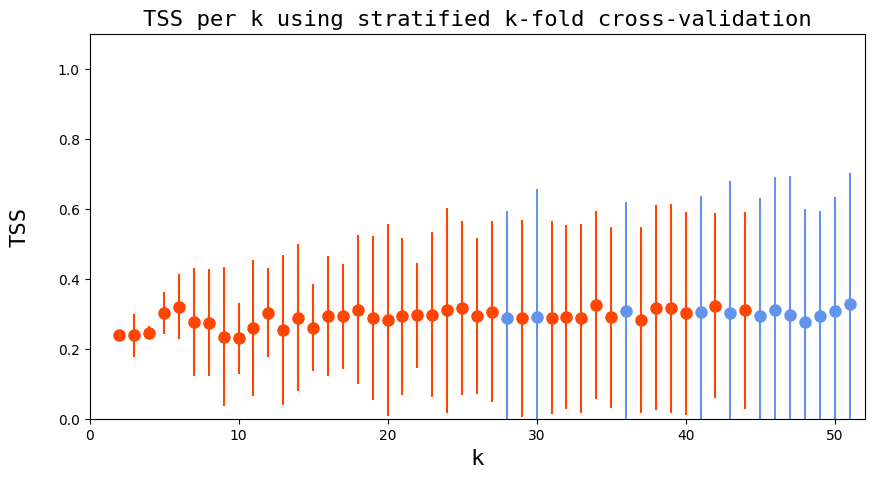

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))      # define the size of the figure
orangered = (1.0, 0.27, 0, 1.0)              # create an orange-red color
cornblue = (0.39, 0.58, 0.93, 1.0)           # create a cornflower-blue color

# define some style elements
marker_style_red = dict(linestyle='', markersize=8,
                        fillstyle='full', color=orangered, markeredgecolor=orangered)
marker_style_blue = dict(linestyle='', markersize=8,
                         fillstyle='full', color=cornblue, markeredgecolor=cornblue)
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})

# ascribe the data to the axes
k = np.arange(50)+2
for i in range(50):
    if (array_of_avg_TSS[i] > array_of_std_TSS[i]):
        ax.errorbar(k[i], array_of_avg_TSS[i],yerr=array_of_std_TSS[i], linestyle='', color=orangered)
        ax.plot(k[i], array_of_avg_TSS[i], 'o', **marker_style_red)
    if (array_of_avg_TSS[i] <= array_of_std_TSS[i]):
        ax.errorbar(k[i], array_of_avg_TSS[i],yerr=array_of_std_TSS[i], linestyle='', color=cornblue)
        ax.plot(k[i], array_of_avg_TSS[i], 'o', **marker_style_blue)

# set plot limits
plt.xlim(xmax=52, xmin=0)
plt.ylim(ymax=1.1, ymin=0)

# label the axes and the plot
ax.set_xlabel('k', **text_style)
ax.set_ylabel('TSS', labelpad=20, **text_style)
plt.title(r'TSS per k using stratified k-fold cross-validation', **text_style)
fig = plt.gcf()
fig.set_size_inches(10, 5)

In [13]:
print("The TSS equals", array_of_avg_TSS[9],"plus or minus", array_of_std_TSS[9], ".")

The TSS equals 0.2600678287844063 plus or minus 0.19398671933110156 .


In [14]:
data.shape

(507, 18)

In [15]:
positive.shape

(125, 23)

In [16]:
negative.shape

(382, 23)